In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics

In [3]:
# Load in csv
ride_df = pd.read_csv("Resources/ride_data.csv")
city_data_df = pd.read_csv ("Resources/city_data.csv")
city_data_df.head(10)
#ride_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
#gget the columns and rows that are not null
city_data_df.count()
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [5]:
#make sure driver_count is an integer data type
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [6]:
#getting the unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [7]:
#to get the number of daa points for each of the above cities
sum(city_data_df["type"]=="Urban")

66

In [8]:
#to get the number of daa points for each of the above cities
sum(city_data_df["type"]=="Suburban")

36

In [9]:
#to get the number of daa points for each of the above cities
sum(city_data_df["type"]=="Rural")

18

In [10]:
# Get the columns and the rows that are not null.
ride_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [11]:
#check for null values
ride_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [12]:
#check the data types of the columns
ride_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [16]:
#Merge  the two dataframes together. the tables have city  in common
# Combine the data into a single dataset
pyber_data_df=pd.merge(ride_df, city_data_df, how="left", on=["city","city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
#need to create separate dataframe for each type of city befor graphing
#create the Urban city Dataframe. 
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [19]:
# Create the Suburban and Rural city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [21]:
# Create the Suburban and Rural city DataFrames.
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [23]:
#get the number of rides for each city in each city type
#create the series where index is the name of the city and column is the number of rides for the city
#gett eh number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [25]:
# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [26]:
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [27]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [28]:
# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [29]:
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [31]:
# Get the average number of drivers for each urban city.
urban_avg_drivers = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_avg_drivers.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [46]:
# Get the average number of drivers for each city for the suburban and rural cities.
suburban_avg_drivers = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_avg_drivers.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [47]:
rural_avg_drivers = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_avg_drivers.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

In [35]:
#create the chart for each of the city types then combine into one
#scatter plot for each type of city with legend being the city type
#x-axis = number of rides for each city
#y-axis is average fare for each city
#side of marker is the average drivers in each city

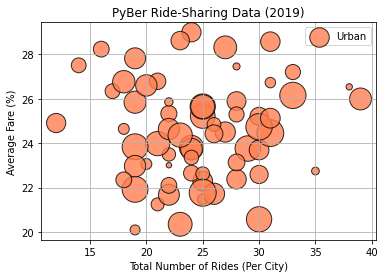

In [63]:
#scatter plot for Urban cities
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_avg_drivers, c="coral", edgecolor="black", linewidths=1, alpha=0.8, label="Urban")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare (%)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()

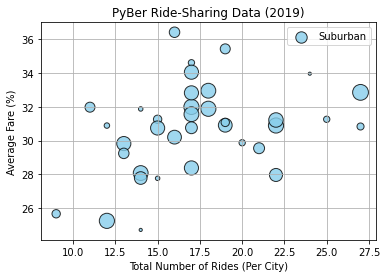

In [64]:
#scatter plot for surburban cities
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_avg_drivers, c="skyblue", edgecolor="black", linewidths=1, alpha=0.8, label="Suburban")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare (%)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()

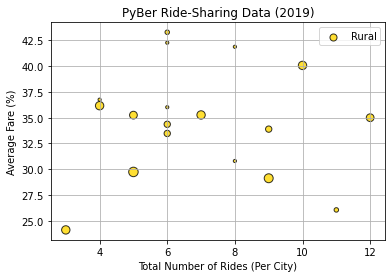

In [65]:
#scatter plot for Rural cities
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_avg_drivers, c="gold", edgecolor="black", linewidths=1, alpha=0.8, label="Rural")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare (%)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()

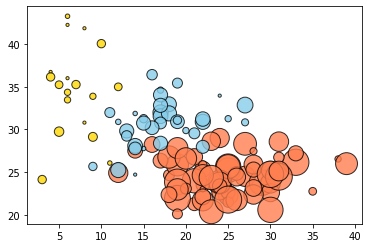

In [67]:
#combine the graphs into one
# Add the scatter charts for each type of city.
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_avg_drivers, c="coral", edgecolor="black", linewidths=1, alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_avg_drivers, c="skyblue", edgecolor="black", linewidths=1, alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_avg_drivers, c="gold", edgecolor="black", linewidths=1, alpha=0.8, label="Rural")

#show the plot
plt.show()

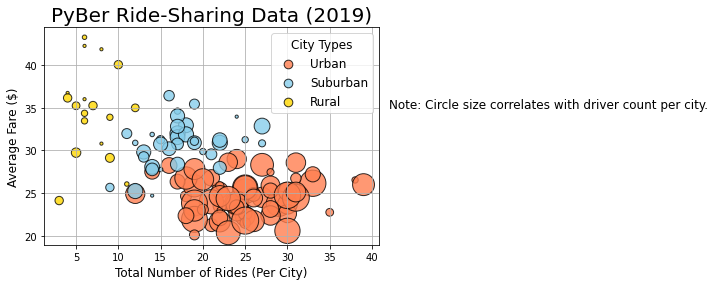

In [79]:
#combine the graphs into one
# Add the scatter charts for each type of city.
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_avg_drivers, c="coral", edgecolor="black", linewidths=1, alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_avg_drivers, c="skyblue", edgecolor="black", linewidths=1, alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_avg_drivers, c="gold", edgecolor="black", linewidths=1, alpha=0.8, label="Rural")

#incorporate other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
#customize the legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("Analysis/Fig1.png")

In [81]:
#get summary statstics
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [82]:
#get summary statstics
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [83]:
#get summary statstics
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [86]:
# Get summary statistics.
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [87]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [88]:
round(urban_ride_count.median(),2)

24.0

In [90]:
# Calculate the mode of the ride count for the urban cities.
suburban_ride_count.mode()

0    17
dtype: int64

In [93]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [92]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [103]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [104]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [106]:
#get the fares for the suburban cities
suburban_fares=suburban_cities_df["fare"]

In [107]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for urban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for urban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for urban trips is {mode_suburban_fares}.")

The mean fare price for urban trips is $30.97.
The median fare price for urban trips is $30.75.
The mode fare price for urban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [112]:
#get the fares for the rural cities
rural_fares=rural_cities_df["fare"]

In [113]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for urban trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for urban trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for urban trips is {mode_rural_fares}.")

The mean fare price for urban trips is $34.62.
The median fare price for urban trips is $37.05.
The mode fare price for urban trips is ModeResult(mode=array([37.05]), count=array([2])).


In [114]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [118]:
# Calculate the measures of central tendency for the urban drivers.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean driver count for urban trips is ${mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median driver count for urban trips is ${median_urban_fares:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode driver count for urban trips is {mode_urban_drivers}.")

The mean driver count for urban trips is $36.68.
The median driver count for urban trips is $24.64.
The mode driver count for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [121]:
# Get the driver count data from the suburban cities.
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [123]:
# Calculate the measures of central tendency for the urban drivers.
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean driver count for suburban trips is ${mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median driver count for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode driver count for suburban trips is {mode_suburban_drivers}.")

The mean driver count for suburban trips is $13.71.
The median driver count for suburban trips is $30.75.
The mode driver count for suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).


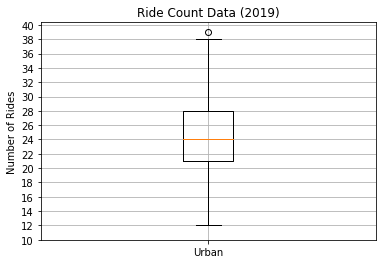

In [124]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

ValueError: X must have 2 or fewer dimensions

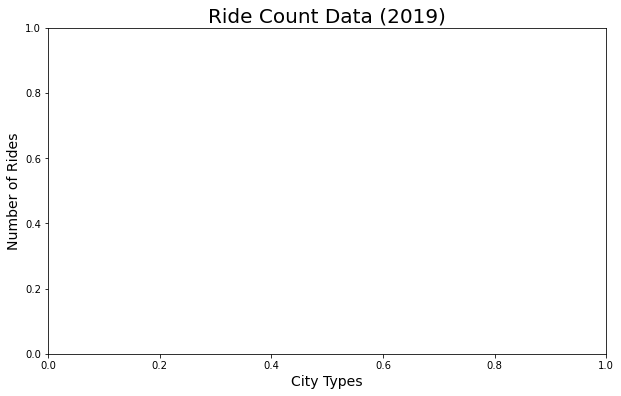

In [140]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
#ax.set_yticks(np.arange(0, 45, step=3.0))
#ax.grid()
# Save the figure.
#plt.savefig("Analysis/Fig2.png")

In [147]:
#group the data by type so city is index.
#apply the sum to the fair to get series with total number of fairs for each city type
#divide total fares by each city type
total_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"] 
total_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [152]:
#get the total fare for all city types
total_fare=pyber_data_df.sum()["fare"]
total_fare

63538.64

In [157]:
# Calculate the percentage of fare for each city type.
fare_percentage = total_fares_by_type/total_fare*100
fare_percentage

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [158]:
#Do the above three codes in one line
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

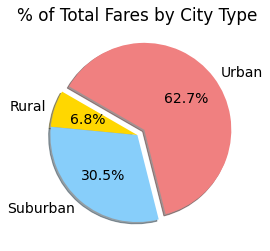

In [170]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl

#create a pie chart 
plt.pie(type_percents, labels=["Rural","Suburban", "Urban"],
       colors=["gold", "lightskyblue","lightcoral"],
       explode=[0,0,0.1],
        autopct='%1.1f%%',
       shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

#save the graph
plt.savefig("Analysis/Fig5.png")

In [171]:
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [178]:
#get total rides for each city type
#get total rides for all city type
#calculate the percentage
ride_percentage = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df.count()["ride_id"]
ride_percentage

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

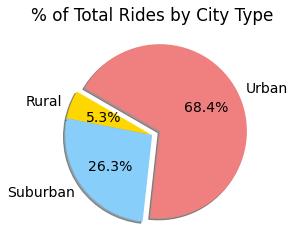

In [180]:
#create a pie chart 
plt.pie(ride_percentage, labels=["Rural","Suburban", "Urban"],
       colors=["gold", "lightskyblue","lightcoral"],
       explode=[0,0,0.1],
        autopct='%1.1f%%',
       shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

#save the graph
plt.savefig("Analysis/Fig6.png")

In [186]:
#get total number of drivers for each city type
#get total drivers for all city types
#calculate the percentage
drive_percentage = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df.sum()["driver_count"]
drive_percentage

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

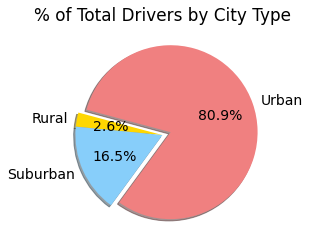

In [187]:
#create a pie chart 
plt.pie(drive_percentage, labels=["Rural","Suburban", "Urban"],
       colors=["gold", "lightskyblue","lightcoral"],
       explode=[0,0,0.1],
        autopct='%1.1f%%',
       shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

#save the graph
plt.savefig("Analysis/Fig7.png")